Escrito por Wissam Melo

In [ ]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


def bases(D, x, y, alt=15):
    num_x = int(x/D)
    num_y = int(y/D)
    total = num_x*num_y
    n = np.array([])
    for i in range(num_y):
        for j in range(num_x):
            n = np.append(n, np.array([(j*D)+(D/2),(i*D)+(D/2),alt])) 
        
    return total, n.reshape(total,3)

In [2]:
total,BS = bases(50, 200, 100)

In [3]:
BS

array([[ 25.,  25.,  15.],
       [ 75.,  25.,  15.],
       [125.,  25.,  15.],
       [175.,  25.,  15.],
       [ 25.,  75.,  15.],
       [ 75.,  75.,  15.],
       [125.,  75.,  15.],
       [175.,  75.,  15.]])

In [4]:
def usuário(n, x, y):
    UE = np.array([])
    for i in range(n):
        UE = np.append(UE,np.array([x*np.random.random(),y*np.random.random(),1.5]))
    return UE.reshape(n,3)

In [50]:
#número de UEs
num_ue = 3

UE = usuário(num_ue, 200, 100)

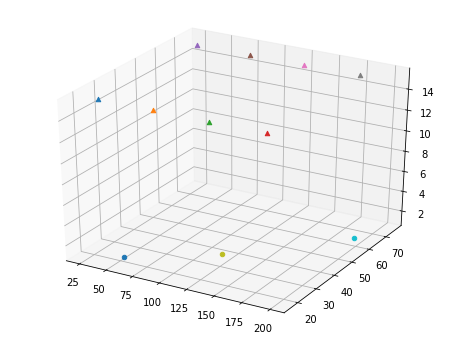

In [51]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(8):
    ax.scatter(BS[i][0], BS[i][1], BS[i][2], marker='^')
for n in range(num_ue):
    ax.scatter(UE[n][0], UE[n][1], UE[n][2], marker='o')

In [52]:
UE[0]

array([123.87600195,  31.69384466,   1.5       ])

# Método 1

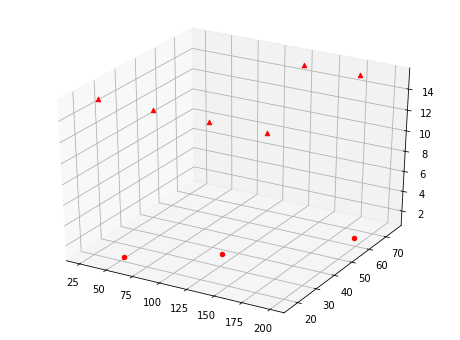

In [53]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

endereços = []

for n in range(num_ue):
    BS_UE = np.array([])
    conectadas = 0
    #ax.scatter(BS[i][0], BS[i][1], BS[i][2], marker='^', c='blue')
    for i in range(total):
        dist = np.linalg.norm(BS[i]-UE[n])
        if dist <= 50:
            conectadas += 1
            BS_UE = np.append(BS_UE, BS[i])
            ax.scatter(BS[i][0], BS[i][1], BS[i][2], marker='^', c='red')
        #else:
        #    ax.scatter(BS[i][0], BS[i][1], BS[i][2], marker='^', c='blue')
    BS_UE = np.append(BS_UE, 0)
    
    ax.scatter(UE[n][0], UE[n][1], UE[n][2], marker='o', c='red')
    endereços = np.append(endereços,BS_UE)
#endereços = endereços.reshape(int((endereços.shape[0])/3),3)

In [54]:
BS_UE

array([25., 25., 15., 75., 25., 15.,  0.])

In [55]:
endereços

array([125.,  25.,  15., 125.,  75.,  15.,   0., 175.,  25.,  15., 175.,
        75.,  15.,   0.,  25.,  25.,  15.,  75.,  25.,  15.,   0.])

In [56]:
# printing original list 
print("The original list : " + str(endereços)) 
  
# using list comprehension + zip() + slicing + enumerate() 
# Split list into lists by particular value 
size = len(endereços) 
idx_list = [idx + 1 for idx, val in enumerate(endereços) if val == 0] 

  
res = [endereços[i: j] for i, j in zip([0] + idx_list, idx_list + ([size] if idx_list[-1] != size else []))] 
  
# print result 
print("The list after splitting by a value : " + str(res))

The original list : [125.  25.  15. 125.  75.  15.   0. 175.  25.  15. 175.  75.  15.   0.
  25.  25.  15.  75.  25.  15.   0.]
The list after splitting by a value : [array([125.,  25.,  15., 125.,  75.,  15.,   0.]), array([175.,  25.,  15., 175.,  75.,  15.,   0.]), array([25., 25., 15., 75., 25., 15.,  0.])]


In [57]:
res[1]

array([175.,  25.,  15., 175.,  75.,  15.,   0.])

In [58]:
len(res)

3

In [59]:
for i in range(len(res)):
    indices = np.where(res[i]==0)
    res[i] = np.delete(res[i], indices)
    res[i] = res[i].reshape(int((res[i].shape[0])/3),3)

In [60]:
res

[array([[125.,  25.,  15.],
        [125.,  75.,  15.]]),
 array([[175.,  25.,  15.],
        [175.,  75.,  15.]]),
 array([[25., 25., 15.],
        [75., 25., 15.]])]

# Método 2

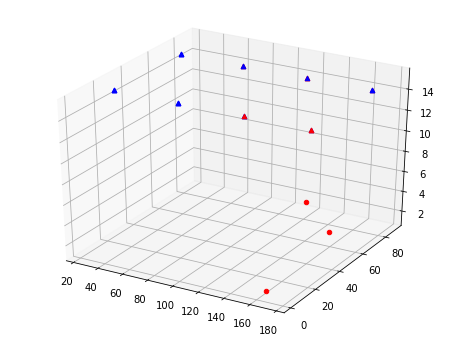

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

endereços = []

for n in range(num_ue):
    BS_UE = np.array([])
    conectadas = 0
    for i in range(total):
        dist = np.linalg.norm(BS[i]-UE[n])
        if dist <= 50:
            conectadas += 1
            BS_UE = np.append(BS_UE, BS[i])
            ax.scatter(BS[i][0], BS[i][1], BS[i][2], marker='^', c='red')
        else:
            ax.scatter(BS[i][0], BS[i][1], BS[i][2], marker='^', c='blue')
    BS_UE = np.append(BS_UE, [0,0,0])
    
    ax.scatter(UE[n][0], UE[n][1], UE[n][2], marker='o', c='red')
    endereços = np.append(endereços,BS_UE)
endereços = endereços.reshape(int((endereços.shape[0])/3),3)

In [16]:
endereços

array([[175.,  25.,  15.],
       [125.,  75.,  15.],
       [175.,  75.,  15.],
       [  0.,   0.,   0.],
       [ 75.,  75.,  15.],
       [125.,  75.,  15.],
       [  0.,   0.,   0.],
       [125.,  25.,  15.],
       [175.,  25.,  15.],
       [  0.,   0.,   0.]])